In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
sequential = pd.read_csv("sequential-selection-sort-results.txt", sep="\t")
concurrent = pd.read_csv("concurrent-selection-sort-results.txt", sep="\t")

In [54]:
concurrent

,size,ascending(MS),descending(MS),shuffled(MS)
0,10000,0,0,16
1,20000,0,0,32
2,30000,0,0,66
3,40000,0,0,135
4,50000,0,0,159
5,60000,0,0,200
6,70000,0,0,277
7,80000,0,0,344
8,90000,0,0,435
9,100000,0,0,523


In [55]:
sequential

,size,ascending(MS),descending(MS),shuffled(MS)
0,10000,0,0,125
1,20000,0,0,368
2,30000,0,0,774
3,40000,0,0,1381
4,50000,0,0,2021
5,60000,0,0,3078
6,70000,0,0,4264
7,80000,0,0,5634
8,90000,0,0,7179
9,100000,0,0,8906


In [56]:
diffs = (abs(sequential["shuffled(MS)"] - concurrent["shuffled(MS)"]) / concurrent["shuffled(MS)"]) * 100
size = sequential["size"]

In [57]:
percent_diffs = pd.DataFrame({"Array Size" : size, "Percent Speedup" : diffs})

In [58]:
percent_diffs

,Array Size,Percent Speedup
0,10000,681.250000
1,20000,1050.000000
2,30000,1072.727273
3,40000,922.962963
4,50000,1171.069182
5,60000,1439.000000
6,70000,1439.350181
7,80000,1537.790698
8,90000,1550.344828
9,100000,1602.868069


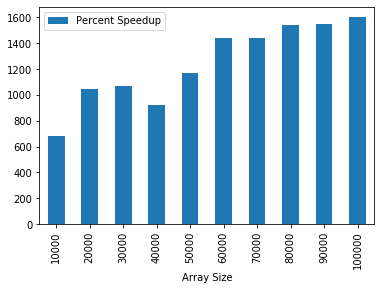

In [59]:
axe = percent_diffs.plot.bar(x='Array Size', y='Percent Speedup', rot=90)

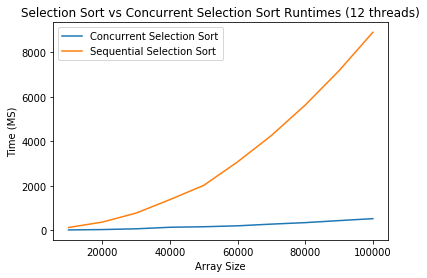

In [60]:
f, ax = plt.subplots(1)
ax.title.set_text("Selection Sort vs Concurrent Selection Sort Runtimes (12 threads)")
ax.plot(concurrent["size"], concurrent["shuffled(MS)"], label="Concurrent Selection Sort")
ax.plot(sequential["size"], sequential["shuffled(MS)"], label="Sequential Selection Sort")
ax.set_xlabel("Array Size")
ax.set_ylabel("Time (MS)")
ax.legend()
plt.show()